In [3]:
# Genetic Algorithm
import numpy as np
import matplotlib.pyplot as plt

# Parameters
population_size = 1000   # Number of individuals in each generation
num_variables = 5        # Number of parameters to optimize
num_parents = 500        # Number of parents selected to breed
num_generations = 100   # Number of generations
crossover_rate = 0.8     # Probability of crossover
mutation_rate = 0.01      # Probability of mutation
mutation_range = 1     # Range of mutation

# Test Solution
solution = np.random.rand(1,5)*100

# Initialize population
population = np.random.randint(0, 101, (population_size, num_variables))

def calculate_fitness(population, solution):
    difference = 100 - np.abs(solution - population)
    fitness = np.sum(difference, axis=1) / (100 * population.shape[1])
    return fitness

def crossover(parents, crossover_rate, population_size):
    num_parents = parents.shape[0]
    num_variables = parents.shape[1]

    # Initialize offspring population array
    offspring_population = np.zeros((population_size, num_variables))
    current_count = 0

    while current_count < population_size:
        # Randomly shuffle the order of parents
        shuffled_indices = np.random.permutation(num_parents)
        shuffled_parents = parents[shuffled_indices, :]

        # Iterate over pairs of parents
        for i in range(0, num_parents, 2):
            if current_count >= population_size:
                break

            if i == num_parents - 1:
                offspring_population[current_count, :] = shuffled_parents[i, :]  # if odd number parents
                current_count += 1
            else:
                parent1 = shuffled_parents[i, :]
                parent2 = shuffled_parents[i + 1, :]

                if np.random.rand() < crossover_rate:
                    # Perform crossover
                    crossover_point = np.random.randint(1, num_variables)
                    offspring1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
                    offspring2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
                else:
                    # No crossover, offspring are copies of parents
                    offspring1 = parent1
                    offspring2 = parent2

                # Add offspring to the population
                offspring_population[current_count, :] = offspring1
                current_count += 1

                if current_count < population_size:
                    offspring_population[current_count, :] = offspring2
                    current_count += 1

    return offspring_population

def mutate(new_population, mutation_rate, mutation_range):
    population_size = new_population.shape[0]
    num_variables = new_population.shape[1]

    mutated_population = new_population.copy()

    for i in range(population_size):
        for j in range(num_variables):
            if np.random.rand() < mutation_rate:
                mutation_value = (np.random.rand() - 0.5) * 2 * mutation_range
                mutated_population[i, j] = mutated_population[i, j] + mutation_value
                mutated_population[i, j] = max(0, min(100, mutated_population[i, j]))

    return mutated_population

fit_plot = np.zeros(num_generations)
avgfit_plot = np.zeros(num_generations)
# Genetic Algorithm
for i in range(num_generations):
    # Fitness
    fitness = calculate_fitness(population, solution)
    avgfit_plot[i] = np.mean(fitness)
    fit_plot[i] = np.max(fitness)
    if np.mean(fitness) >= 0.9:
        break
    # Fitness
    fitness = calculate_fitness(population, solution)

    # Selection
    parents = population[np.random.choice(population_size, num_parents, p=fitness/fitness.sum())]

    # Breeding Crossover and Mutation
    population = crossover(parents, crossover_rate, population_size)
    population = mutate(population, mutation_rate, mutation_range)

# Evaluation
fitness = calculate_fitness(population, solution)
max_value = np.max(fitness)
index_of_max = np.argmax(fitness)
min_value = np.min(fitness)
index_of_min = np.argmin(fitness)
avg_fit = np.mean(fitness)
best_fit = max_value
best = population[index_of_max, :]
worse_fit = min_value
worse = population[index_of_min, :]

print("Average Fitness:", avg_fit)
print("Best Fitness:", best_fit)
print("number of generations:", i+1)
print("solution", solution)
print("Best Solution:", best)
print("Worst Fitness:", worse_fit)
print("Worst Solution:", worse)


Average Fitness: 0.9021042716037391
Best Fitness: 0.9893920275540697
number of generations: 38
solution [[22.89826975 64.39270789  4.16682846 74.44998027 94.11696806]]
Best Solution: [23.         64.          3.02426818 75.         91.        ]
Worst Fitness: 0.7143329884299687
Worst Solution: [ 5.          3.         14.13662589 41.9942176  73.        ]


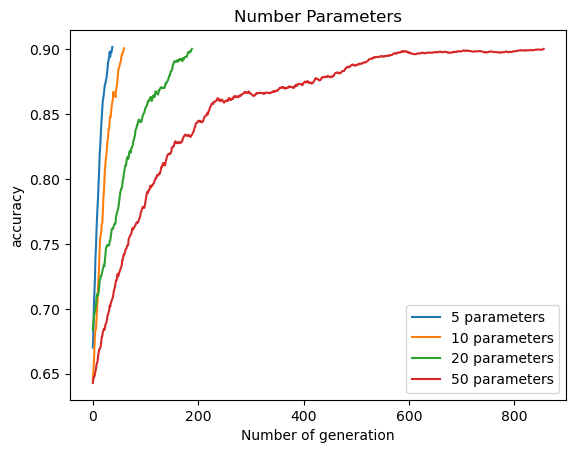

In [50]:
plt.plot(para_5, label="5 parameters")
plt.plot(para_10, label="10 parameters")
plt.plot(para_20, label="20 parameters")
plt.plot(para_50, label="50 parameters")
plt.legend()
plt.xlabel("Number of generation")
plt.ylabel("accuracy")
plt.title("Number Parameters")
plt.show()